# Final Exam - 100 points

#### 1.) The following figure shows two curves. The top curve is f(x) = -x<sup>2</sup> + 4x + 3 and the bottom curve is g(x) = -x<sup>3</sup> + 7x<sup>2</sup> - 10x + 5. What is the area between the two curves in the interval [1,2]? In other words, what is the area of the pink shaded region? (6 points)

![](https://narock.github.io/teaching/CST-411/final_exam_figure_1.png)

In [39]:
import numpy as np
import pandas as pd
import scipy.integrate 
import matplotlib.pyplot as plt

def f(x):
    return -x**2 + 4*x + 3

def g(x):
    return -x**3 + 7*x**2 - 10*x + 5

fx = scipy.integrate.quad(f, 1, 2)
gx = scipy.integrate.quad(g, 1, 2)
diff = fx[0] - gx[0]
print("Shaded in area =", diff)

Shaded in area = 4.083333333333334


#### 2.) A system of linear equations is given by:
#### 3x + 2y - z = 1
#### 2x - 2y + 4z = -2
#### -x + 0.5y - z = 0
#### What are the values of x, y, and z that simultaneously solve all three equations? (3 points)

In [11]:
A = np.array([[3, 2, -1], [2, -2, 4], [-1, 0.5, -1]])
B = np.array([[1],[-2],[0]])
np.linalg.solve(A,B)

array([[ 1.],
       [-2.],
       [-2.]])

#### 3.) What is a Monte Carlo simulation? (6 points)

#### 4.) There is a dataset on Iris flowers available at
 http://narock.github.io/teaching/CST-411/visualization/iris.csv
#### Use the Pandas library to read the data into this notebook. Use the head() function to list the first few lines of the dataset. The data are in rows and columns with each column separated by a comma (CSV file) (3 points)

In [15]:
url = 'http://narock.github.io/teaching/CST-411/visualization/iris.csv'
iris = pd.read_csv(url)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 5.) The columns PetalLenghtCm and PetalWidthCm from the above iris.csv file contain measurements, in centimeters, of Iris flower petal length and petal width, respectively. Make a scatter plot with petal length on the x-axis and petal width on the y-axis. Label both the x and y axes. Create a title for the visualization as well. (4 points)

Text(0.5,1,'Iris Flower')

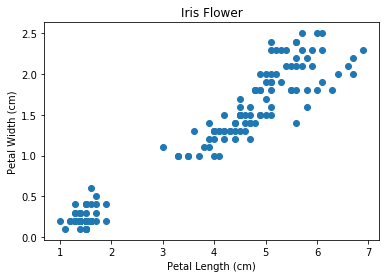

In [27]:
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flower')

#### 6.) Looking at the visualization from 5., it looks like there is a linear relationship between petal length and petal width. Let's fit the data to a straight line y = mx + b. What are the "best" values of m and b to use? (4 points) 

In [29]:
import scipy.optimize

def line(x, m, b):
    return m*x + b
    
fit, covar = scipy.optimize.curve_fit(line, iris['PetalLengthCm'], iris['PetalWidthCm'])
print("Best fit for m: ", fit[0], "best fit for b:", fit[1])

Best fit for m:  0.4164191327469227 best fit for b: -0.36651404713788666


#### 7.) Plot the best fit line on top of the data points. Specifically, make a scatter plot with Petal Length on the x-axis and Petal Width on the y-axis. Plot the best fit line on the same plot in red. Label the x and y axes and also create a plot title (6 points)

Text(0.5,1,'Iris Flower')

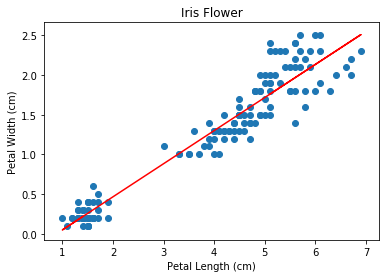

In [33]:
y = fit[0]*iris['PetalLengthCm'] + fit[1]
plt.plot(iris['PetalLengthCm'], y, color='red')
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flower')

#### 8.) How well does the best fit line fit the data? Choose a statistic that compares model fits to data points. There were at least two discussed in class. You may choose which ever one you prefer. Apply the chosen statistic and discuss the result. (5 points)

In [37]:
residuals = iris['PetalWidthCm'] - y
ss_res = np.sum(residuals**2)
ss_tot = np.sum((iris['PetalLengthCm']-np.mean(iris['PetalLengthCm']))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared:", r_squared)

R-squared: 0.9863246649994856


#### 9.) A particle moves in the xy-plane. At any time t ≥ 0 the particle’s x any y positions can be found by

x = -3t<sup>3</sup> + 4t<sup>2</sup>

y = t<sup>3</sup> + 2 

#### Acceleration is the second derivative of position. What is the particle’s x and y acceleration at t = 3? (6 points)


In [42]:
import scipy.misc

def x(t):
    return -3*t**3 + 4*t**2

def y(t):
    return t**3 + 2

ax = scipy.misc.derivative(x, 3, n=2, dx=1e-6)
ay = scipy.misc.derivative(y, 3, n=2, dx=1e-6)
print("Acceration in the x-direction,", ax)
print("Acceration in the y-direction,", ay)

Acceration in the x-direction, -46.01474756782409
Acceration in the y-direction, 18.001600210482138


#### 10.) Our factory is producing Wonderful Widgets. Our revenue (in thousands of dollars) is given by:  r(x) = 10x. 

#### For example, selling one widget = r(1) = 10*1 = 10 = $10,000

#### But, we have to pay electricity bills, and our employees, and take care of other costs. Our total costs are given by:  c(x) = x<sup>3</sup> – 6x<sup>2</sup> + 15x,  also in thousands of dollars

#### Selling one widget cost c(1) = 1<sup>3</sup> – 6*1<sup>2</sup> + 15 = 1 - 6 + 15 = 10 = $10,000

#### Selling just one widget, we break even. How many widgets do we need to sell to maximize our profit? We'll solve this two ways.


#### First, through visualization. 

#### Define a function that describes our profits as a function of x (widgets sold). In other words, how would you combine the revenue function, r(x), and the cost function, c(x), to get a profit function, p(x)? (3 points)

#### Visualize the profit function with labels on both the x and y axis (4 points)

#### Find the maximum of the profit function. (3 points)

#### How many widgets sold does the maximum correspond to? (3 points)

***

#### 10. Part b.) - Now, we'll solve the same problem, but this time using derivatives.

#### A point c is a critical point of the function f if the first derivative of f, evaluated at c, equals 0. f'(c) = 0

#### What are the critical points of your profit function? (7 points)

#### A critical point c is a maximum when f’’(c) < 0. Which of your critical points is a maximum? (4 points)

#### Place the critical point corresponding to the maximum into your profit function and print out how many widgets we need to sell to maximize our profits AND what the profits will be when that many widgets are sold. (3 points)

In [44]:
import math
#f1 = -3x**2 + 12*x - 5
a = -3
b = 12
c = -5
c1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2 * a)
c2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2 * a)
print("The critical points are", c1, "and", c2)

The critical points are 0.4724747683480534 and 3.5275252316519463


In [45]:
def profit(x):
    return -x**3 + 6*x**2 - 5*x

a1 = scipy.misc.derivative(profit, c1, n=2) 
a2 = scipy.misc.derivative(profit, c2, n=2) 
print(a1, a2)
print("The second critical point is a maximum")

9.165151389911678 -9.165151389911706
The second critical point is a maximum


In [46]:
print("Our profit is maximized at x =", c2, "thousand widgets")
print("Our profit there will be", profit(c2), "thousand dollars")

Our profit is maximized at x = 3.5275252316519463 thousand widgets
Our profit there will be 13.128451081042424 thousand dollars


#### 11.) Monte Carlo simulation can be used to approximate integration. In this problem, we're going to step through how this can be done and compare the results to Scipy's integration approximation.

#### The function we are going to integration is 3x<sup>2</sup>. Here's what this function looks like over the interval [0,5]. 

#### We'd like to integrate from 0.3 to 2.5, the shaded region

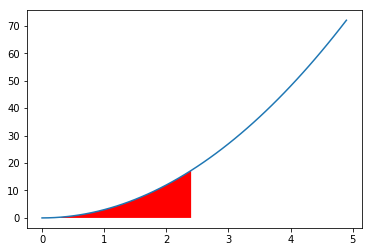

In [82]:
def f(x):
    return 3*x**2

x = np.arange(0,5,.1)
plt.plot(x, f(x))

x_shaded = np.arange(0.3,2.5,0.1)
y_shaded = f(x_shaded)
plt.fill_between(x_shaded, y_shaded, facecolor='red')

#### The first step is to create a rectangle over the interval we are interested in.

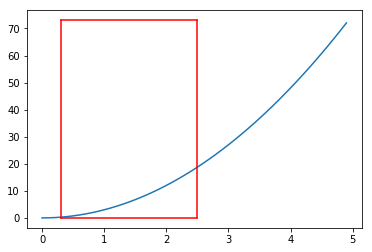

In [73]:
x1 = 0.3
x2 = 2.5
y1 = 0.
y2= float(max((f(x)))+1)
x = np.arange(0,5,.1)
plt.plot(x, f(x))
plt.plot([x1,x1],[y1,y2],'r-')
plt.plot([x2,x2],[y1,y2],'r-')
plt.plot([x1,x2],[y2,y2],'r-')
plt.plot([x1,x2],[0,0],'r-')

#### What is the area of this rectangle? (2 points)

In [54]:
area=(x2-x1)*(y2-y1)
print(area)

160.66600000000005


#### Choose one thousand random floating point x-values inside this rectangle (5 points)
#### Choose one thousand random floating point y-values inside this rectangle (5 points)

#### Now, we're going to check how many points are above our 3x<sup>2</sup> curve and how many are below it.

#### Create an empty list named 'check' (1 point)

#### Write python statements that perform the following: (7 points)
#### if absolute_value(random y) > f(x) then append to check a 0 otherwise append 1
#### in other words, for each randomly chosen [x,y] we want to see if the y value is greater than or less than f(x). If it's greater, the randomly chosen point [x,y] is above our function f(x) = 3x<sup>2</sup> and we append 0 to check. If it's less, then the randomly chosen point [x,y] is below our function f(x) = 3x<sup>2</sup> and we append 1 to check

#### The area under the f(x) curve from 0.3 to 2.5 can be approximated by examining what fraction of our randomly chosen points are under the curve. Specifically, you can compute this by taking the mean of the list 'check' and multiplying it by the area of the rectangle you computed above. The area we computed earlier is the total area of the rectangle, which includes both above and below f(x). By multiplying this by the fraction of points we found below f(x) we get a rough approximation of the area under the curve, i.e. the integral. 

#### What is the approximate value of the area under the curve from 0.3 to 2.5 using this method? (2 points)

In [80]:
xs = []
ys = []
check = []
for i in range(1000):
    
    x = np.random.uniform(x1, x2)
    y = np.random.uniform(y1, y2)
    xs.append(x)
    ys.append(y)

    if abs(ys[i])>abs(f(xs[i])):
        check.append(0)
    else:
        check.append(1)
        
print("Area under the curve between 0.3 and 2.5 is", np.mean(check)*area)

Area under the curve between 0.3 and 2.5 is 18.155258000000007


#### Let's visualize this. The code in the cell below will graph the f(x) curve and our red bounding rectangle. Add python statements to this cell that will also show your randomly chosen x and y values as a scatter plot. (3 points)

<b>Extra credit points (3 points) for plotting the points above f(x) in a different color to the points below f(x)</b>

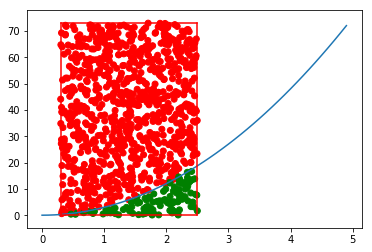

In [87]:
x1 = 0.3
x2 = 2.5
y1 = 0.
y2= float(max((f(x)))+1)
x = np.arange(0,5,.1)
plt.plot(x, f(x))
plt.plot([x1,x1],[y1,y2],'r-')
plt.plot([x2,x2],[y1,y2],'r-')
plt.plot([x1,x2],[y2,y2],'r-')
plt.plot([x1,x2],[0,0],'r-')

colors = []
for i in range(1000):
    if (check[i] == 1):
        colors.append('green')
    else:
        colors.append('red')
plt.scatter(xs,ys, color = colors)

#### What does scipy.integrate.quad return as an approximation of integrating f(x) from 0.3 to 2.5? (2 points)

In [77]:
I = scipy.integrate.quad(f, 0.3, 2.5)
print(I[0])

15.598000000000004


#### The more random points we use the closer our approximation will be to what scipy.integrate.quad outputs. How close do we get if we use 100,000 points? Repeat the above steps for 100,000 randomly [x,y] values (3 points)

In [79]:
xs = []
ys = []
check = []
for i in range(100000):
    
    x = np.random.uniform(x1, x2)
    y = np.random.uniform(y1, y2)
    xs.append(x)
    ys.append(y)

    if abs(ys[i])>abs(f(xs[i])):
        check.append(0)
    else:
        check.append(1)
        
print("Area under the curve between 0.3 and 2.5 is", np.mean(check)*area)

Area under the curve between 0.3 and 2.5 is 15.762941260000005
